In [2]:
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [9]:
cat_pictures = "C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images"
fns = get_image_files(cat_pictures)
fns

(#126602) [Path('C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images/Abyssinian/12136161_252.jpg'),Path('C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images/Abyssinian/13743713_251.jpg'),Path('C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images/Abyssinian/14092337_250.jpg'),Path('C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images/Abyssinian/14475392_248.jpg'),Path('C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images/Abyssinian/16485182_247.jpg'),Path('C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images/Abyssinian/16734355_246.jpg'),Path('C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images/Abyssinian/17041760_245.jpg'),Path('C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images/Abyssinian/17060240_244.jpg'),Path('C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images/Abyssinian/17361971_242.jpg'),Path('C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images/Abyssinian/17361980_243.jpg')

In [13]:
failed = verify_images(fns)
failed

(#1) [Path('C:/Users/maxjo/OneDrive/Bureau/Code/Python/What-the-cat/images/Somali/33477513_41.jpg')]

In [14]:
failed.map(Path.unlink)

(#1) [None]

In [15]:
cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # Initialisation d'un DataBlock avec comme cible une catégorie (CategoryBlock) et comme feature une image (ImageBlock)
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Le splitter (RandomSplitter) permettant de diviser les données en 2 parties (test, train)
    get_y=parent_label)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


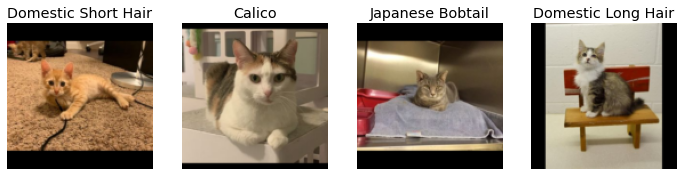

In [16]:
cats = cats.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = cats.dataloaders(cat_pictures)
dls.valid.show_batch(max_n=4, nrows=1)

In [17]:
dls = cats.dataloaders(cat_pictures) # Creation du dataloaders

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


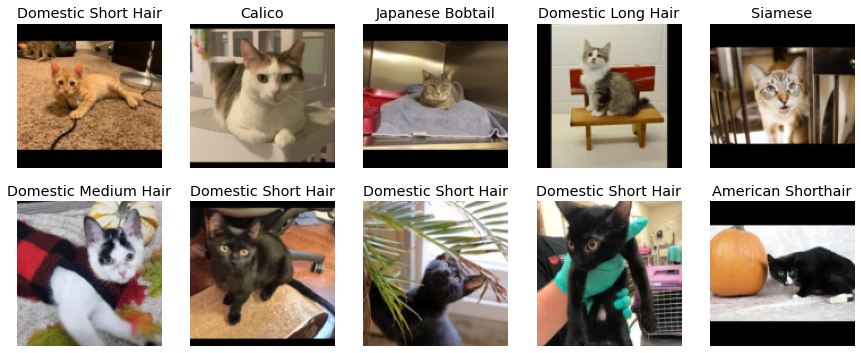

In [18]:
dls.valid.show_batch(max_n=10, nrows=2) # Affichage des batchs

In [19]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\maxjo/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 105MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,2.278407,2.119282,0.544945,37:34


epoch,train_loss,valid_loss,error_rate,time
0,1.933830,1.878523,0.508215,48:24
1,1.879294,1.823739,0.496011,52:44
2,1.758369,1.800140,0.487836,47:23
3,1.624541,1.771367,0.483136,45:40
4,1.424384,1.834758,0.496959,45:29
5,1.200300,1.963563,0.505174,44:02
6,0.929385,2.140293,0.505371,48:54
7,0.737936,2.401250,0.509953,45:32
8,0.558927,2.508156,0.524684,46:13
9,0.505269,2.554469,0.529581,45:43


In [20]:
learn.export()

In [4]:
import discord
import asyncio
from discord.ext import tasks
from discord.ext import commands
from discord_param import discord_token
from discord.ext import commands

client = discord.Client()
learn = load_learner('export.pkl')

@tasks.loop(seconds = 1)
async def myLoop():
    # Attends que le bot soit connecté
    await client.wait_until_ready()
    channel = client.get_channel(741298761569009826)
    # Envoie un message si la dernière vidéo est différente de la dernière vidéo envoyée
    message = (await channel.history(limit=1).flatten())[0]
    print(message.attachments)
    if message.attachments:
        await channel.send(f"<@{message.author.id}> nice cat")


myLoop.start()
asyncio.get_event_loop().create_task(client.start(discord_token))

<Task pending name='Task-4' coro=<Client.start() running at C:\Users\maxjo\anaconda3\envs\tf-gpu\lib\site-packages\discord\client.py:649>>

[<Attachment id=935305819963142165 filename='9k.png' url='https://cdn.discordapp.com/attachments/741298761569009826/935305819963142165/9k.png'>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[<Attachment id=935307231782645820 filename='9k.png' url='https://cdn.discordapp.com/attachments/741298761569009826/935307231782645820/9k.png'>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [5]:
myLoop.stop()

[]
